In [1]:
# IMT 547 SP19 - Python Basics Exercise
### Instructor: Li Zeng (lizeng@uw.edu) - Due: April 21, Sunday at 11:59 pm
### Name: Nandy Giridharan
### Collaborators:

### Instructions

0. Please complete the lab tutorial which accounts for two points before you work on this exerise.

1. Please write down your name and your collaborators (if any).

2. In this exercise you will get hands-on experiences in importing data into structured format, summarizing data using descriptive statistics (e,g, sum, average, etc.), manipulating data including indexing, slicing and grouping, as well as visualizing data using a foundamental (but believe me also powerful) matplotlib package.

3. The data you will be working with was collected from an activity-tracking platform: Strava. It is a collection of physical activities that Strava users recorded and posted on this platform. For simplicity, this exercise focuses on several selected fields. You can find the data description by reading the Strava API doc, following this link: https://developers.strava.com/docs/reference/#api-models-DetailedActivity

4. For each question, please type your codes in a *Code* cell and your written response which summarizes your results in a *Markdown* cell.

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# you may import other packages if necessary

### 1. Data Import and Data Summary

**(a) Load the data lab_strava_activity.csv into a pandas dataframe.**

In [160]:
ds1 = pd.read_csv('C:/Users/Sakura/Documents/Social Media Analysis/lab_strava_activity.csv')
ds1.head(5) #display top 5 rows

,name,athlete.sex,athlete.country,start_date_local,distance,achievement_count,type,kudos_count
0,"Mitro"""" :)",F,Ecuador,2014-08-27T15:55:26Z,21580.0,6,Ride,0
1,Ochtendrit,M,The Netherlands,2015-08-04T09:25:02Z,19092.8,0,Ride,0
2,Enough time for a quick and hot 14,M,United States,2015-05-17T14:38:04Z,23023.4,8,Ride,4
3,Ilkley Grassington Buckden and back,F,United Kingdom,2014-05-26T09:20:53Z,101702.0,11,Ride,6
4,Morning Short hike,F,United States,2013-12-19T09:05:16Z,2739.8,0,Hike,0


I have used read_csv to load the file. Second line of code checks whether the data is loaded successfully.

**(b) It's time to get to know your data! Report the number of rows and columns in the dataset.**

In [161]:
print(ds1.shape)
print("Number of rows:", ds1.shape[0])
print("Number of columns:", ds1.shape[1])

(8093, 8)
Number of rows: 8093
Number of columns: 8


The data has 8093 rows and 8 columns

**(c) What variables does this dataset have? Report the variable names along with the data type of each variable.**

In [162]:
print("Variable names: \n",ds1.columns)
print("\nVariable names & Datatype:\n",ds1.dtypes)

Variable names: 
 Index(['name', 'athlete.sex', 'athlete.country', 'start_date_local',
       'distance', 'achievement_count', 'type', 'kudos_count'],
      dtype='object')

Variable names & Datatype:
 name                  object
athlete.sex           object
athlete.country       object
start_date_local      object
distance             float64
achievement_count      int64
type                  object
kudos_count            int64
dtype: object


Variable names & data type are displayed above using dtypes 

### 2. Data Manipulation - Explore Achievement Count by Country

**(a) What are the top 3 countries most Strava users are from in this dataset?**

In [184]:
ds2=ds1.groupby(['athlete.country']).count()['name'].reset_index()
ds2_b = ds2.sort_values(by=['name'], ascending=False)
print("Top 3 countries with most Strava users:\n\n",ds2_b.head(3))

Top 3 countries with most Strava users:

     athlete.country  name
126   United States  2424
125  United Kingdom  1770
1         Australia   632


US, UK & Australia are top 3 countries

**(b) What is the total achievement count of athletes from the United States?**

In [74]:
print(ds1[ds1['athlete.country']=="United States"].groupby(['athlete.country']).sum()['achievement_count'])

athlete.country
United States    7257
Name: achievement_count, dtype: int64


Total achievement count of athletes from US is 7257


**(c) What is the average achievement count of male athletes from the United Kingdom? How is it compared to the counterpart females?**

In [75]:
print(ds1[ds1['athlete.country']=="United Kingdom"].groupby(['athlete.country','athlete.sex']).mean()['achievement_count'])

athlete.country  athlete.sex
United Kingdom   F              4.016413
                 M              5.997745
Name: achievement_count, dtype: float64


Average achievement count of Male atheletes is 5.997745 compared to Female's 4.016413. 

### 3. Data Manipulation - Explore Activity Type

**(a) How many different kinds of activities are there in this data set? Report the name and the total number of completed activities for each type.**

In [124]:
x=pd.value_counts(ds1.type)
print("Number of activity types in dataset=",x.shape[0])

print("\n Activity & total number of completed activites:\n",pd.value_counts(ds1.type))
#print(ds1.groupby(['type']).count()['name'].reset_index())


Number of activities in dataset= 22

 Activity & total number of completed activites:
 Ride               4512
Run                3001
Walk                194
Swim                178
Workout              66
Hike                 37
VirtualRide          26
NordicSki            20
WeightTraining       14
Yoga                  9
AlpineSki             7
Crossfit              5
BackcountrySki        4
IceSkate              4
Rowing                3
Elliptical            3
Snowboard             3
Kayaking              3
StandUpPaddling       1
Snowshoe              1
RockClimbing          1
EBikeRide             1
Name: type, dtype: int64


There are 22 activities in the dataset. I have used "Type" variable to determine kind of activity(did not use name, as it has lot of junk values).

**(b) Which type of activity do most male and female users participate in?**

In [185]:
ds3=ds1.groupby(['athlete.sex','type']).count()['name'].reset_index()

ds3_m=ds3[ds3['athlete.sex']=="M"].sort_values(by=['athlete.sex','name'],ascending=False)
ds3_f=ds3[ds3['athlete.sex']=="F"].sort_values(by=['athlete.sex','name'],ascending=False)


print("Most Male users participate in",ds3_m.iloc[0,1],"activity")
print("Most Female users participate in",ds3_f.iloc[0,1],"activity\n")

print("Data for Reference:\n",ds3)



Most Male users participate in Ride activity
Most Female users participate in Run activity

Data for Reference:
    athlete.sex             type  name
0            F        AlpineSki     3
1            F   BackcountrySki     3
2            F         Crossfit     1
3            F       Elliptical     1
4            F             Hike    21
5            F         Kayaking     2
6            F        NordicSki    12
7            F             Ride  1596
8            F     RockClimbing     1
9            F           Rowing     2
10           F              Run  1886
11           F        Snowboard     2
12           F         Snowshoe     1
13           F  StandUpPaddling     1
14           F             Swim    90
15           F      VirtualRide     7
16           F             Walk   138
17           F   WeightTraining     9
18           F          Workout    40
19           F             Yoga     8
20           M        AlpineSki     4
21           M   BackcountrySki     1
22           

Most males participate in Ride activity(2818 individuals) and females participate in Run activity(1886 individuals)


**(c) What is the average distance covered by users for each type of activity?**

In [133]:
ds2=pd.DataFrame(ds1.groupby(['type']).mean()['distance'].reset_index())
ds2.columns=['Activity_type','Average Distance']
print("Average Distance by Activity Type:\n\n",ds2)

Average Distance by Activity Type:

       Activity_type  Average Distance
0         AlpineSki      30430.657143
1    BackcountrySki       6390.875000
2          Crossfit       2952.600000
3         EBikeRide       7315.700000
4        Elliptical       4436.966667
5              Hike       6812.375676
6          IceSkate      11122.950000
7          Kayaking       5170.033333
8         NordicSki      15314.775000
9              Ride      33102.721121
10     RockClimbing          0.000000
11           Rowing       7558.400000
12              Run       7874.806131
13        Snowboard      20426.433333
14         Snowshoe       3369.600000
15  StandUpPaddling       6816.300000
16             Swim       2303.249438
17      VirtualRide      23320.523077
18             Walk       5024.981959
19   WeightTraining         73.364286
20          Workout       1869.342424
21             Yoga         21.111111


Average distance by activity type is displayed in table above.


### 4. Basic Visualization

**(a) How is the number of kudos received by male users different from female users? Create a visualization in support of your answer.**

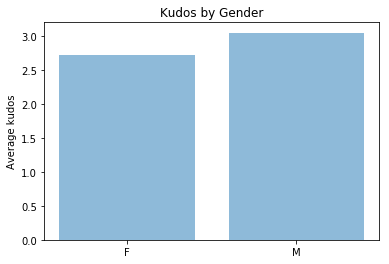

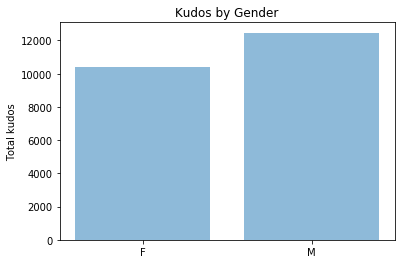

In [140]:
ds2=ds1.groupby(['athlete.sex']).mean()['kudos_count'].reset_index()
ds2.columns=['athlete.sex','kudos_count']
plt.bar(ds2['athlete.sex'], ds2['kudos_count'], align='center', alpha=0.5)
plt.ylabel('Average kudos')
plt.title('Kudos by Gender')
plt.show()

ds2=ds1.groupby(['athlete.sex']).sum()['kudos_count'].reset_index()
ds2.columns=['athlete.sex','kudos_count']
plt.bar(ds2['athlete.sex'], ds2['kudos_count'], align='center', alpha=0.5)
plt.ylabel('Total kudos')
plt.title('Kudos by Gender')
plt.show()

Males have more Kudos than Female. I have displayed both average kudos & total kudos to answer the question.

**(b) Finally, let's explore the best time of day to exercise. Create a visualization to show the diurnal patterns of exercise.**

    activity_hour  count
0               0     13
1               1      8
2               2      4
3               3     12
4               4     46
5               5    274
6               6    525
7               7    607
8               8    760
9               9    709
10             10    525
11             11    443
12             12    431
13             13    358
14             14    335
15             15    379
16             16    538
17             17    650
18             18    655
19             19    461
20             20    212
21             21     79
22             22     42
23             23     27


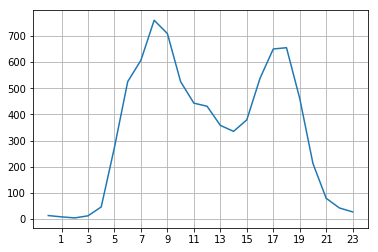

In [186]:
d1 = pd.to_datetime(ds1['start_date_local'])
ds1['activity_hour']=d1.dt.hour

ds2=ds1.groupby(['activity_hour']).count()['name'].reset_index()
ds2.columns=['activity_hour','count']

print(ds2)

plt.xticks(np.arange(x.min(), x.max(), 2))
plt.grid(True)
plt.plot(ds2['activity_hour'],ds2['count'])


Best Time to exercise is at morning 8-9 AM & evening 5 or 6pm.

### 5. Discussion

Congratulations! You just completed all heavy coding and got a taste of exploratory data analysis! You should feel confident (at least for now) in working with data using Python! As we have done with the coding part, I want to ask you a couple of final questions:

**Do you have any concerns with the quality of this data set? Whether and how does any data quality issue affect your analysis?**

This dataset has 'Name" field which has lot of junk values. Though data description says it is activity name- it has date, time, non english characters. This makes it difficult to assess data quality. This data also has missing/blank gender values - the results might be affected because of this.